In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [210]:
df=pd.read_csv('hepatitis_csv.csv')
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [211]:
# NULL 
(df.isnull().sum())

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [212]:
#protime has 43% null values so we can drop it :
df.drop('protime',1,inplace=True)
df.tail()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,True,live
154,43,female,True,False,True,False,False,True,False,True,True,True,False,1.2,100.0,19.0,3.1,True,die


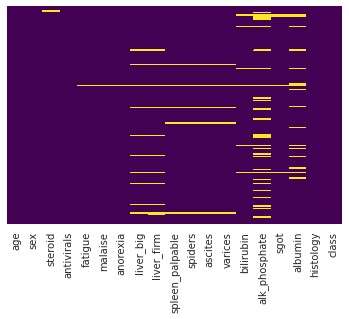

In [213]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

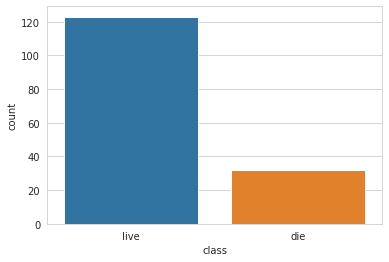

In [214]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=df)

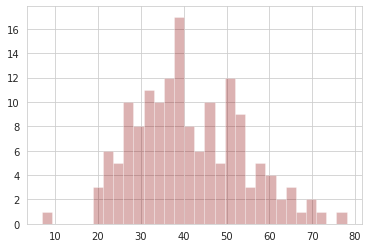

In [215]:
df['age'].hist(bins=30,color='darkred',alpha=0.3)
#maximum age in b/w 32 to 52 for both male and female)

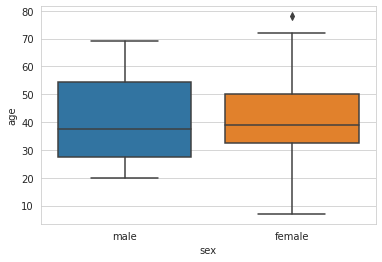

In [216]:
sns.boxplot(x='sex', y='age', data=df)
#box plot for male:
# The first quartile starts at around 20 and ends at 28 which means that 25% of the passengers are aged between 20 and 28. 
# The second quartile starts at around 29 and ends at around 38 which means that 25% of the passengers are aged between 29 and 38. 
# Similarly, the third quartile starts and ends between 39 and 53, hence 25% passengers are aged within this range and 
# finally the fourth or last quartile starts at 54 and ends around 70.

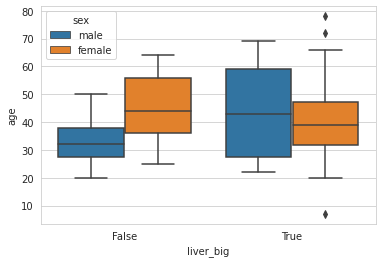

In [217]:
sns.boxplot(x='liver_big', y='age', hue='sex', data=df)

#here we can see the for male : avg age 41+ for taking steroid 
# and in mail avg age is :35+ 

In [218]:
#fill NA values for steroid :
def liver_big(cols):
    age = cols[0]
    liver_big = cols[1]
    sex=cols[2]
    
    if pd.isnull(liver_big): 
      if sex=='male':
        if age <=33:
          return "False"
        if age >33:
          return "True"

      if sex=='female':
        if age <=43:
          return "False"
        if age >43:
          return "True"

    else:
        return liver_big

In [219]:
df['liver_big'] = df[['age','liver_big','sex']].apply(liver_big,axis=1)

In [220]:
df['liver_big'].values

array([False, False, True, True, True, True, True, True, True, True,
       False, True, True, True, True, True, True, True, True, False, True,
       False, True, True, True, True, True, True, False, True, True,
       'True', True, True, True, True, True, False, True, True, True,
       'False', True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, 'False', True, False, True, True,
       True, True, False, True, True, True, True, True, True, True, False,
       'True', True, True, True, False, True, False, True, True, True,
       True, True, True, True, True, True, True, False, False, True,
       'False', True, True, False, True, False, True, False, True, True,
       True, True, True, True, 'False', True, False, True, True, True,
       True, True, True, True, True, True, 'True', False, False, True,
       True, True, True, False, 'False', True, True, True, True, True,
       True, True, True, False, False, True, True, True, False, 'True',
   

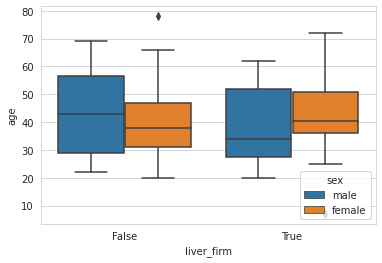

In [221]:
sns.boxplot(x='liver_firm', y='age', hue='sex', data=df)

In [222]:
def liver_firm(cols):
    age = cols[0]
    liver_firm = cols[1]
    sex=cols[2]
    
    if pd.isnull(liver_firm): 
      if sex=='male':
        if age <=43:
          return "False"
        else:
          return "True"

      if sex=='female':
        if age <=35:
          return "False"
        else:
          return "True"

    else:
        return liver_firm

In [223]:
df['liver_firm'] = df[['age','liver_firm','sex']].apply(liver_big,axis=1)

In [224]:
df.liver_firm.values

array([False, False, False, False, False, False, False, False, True,
       False, True, True, True, True, False, False, False, True, False,
       True, False, True, False, False, False, False, True, True, True,
       False, True, 'True', False, True, False, False, False, True, False,
       True, False, 'False', False, False, False, False, True, True,
       False, False, False, False, False, True, False, False, 'False',
       False, True, False, False, False, False, True, False, False, False,
       False, False, False, False, True, 'True', True, False, False, True,
       True, True, False, False, False, False, False, True, True, False,
       True, True, True, True, False, 'False', False, True, True, True,
       True, False, True, True, False, True, True, True, False, 'False',
       False, True, False, True, False, False, True, False, False, False,
       False, 'True', True, True, False, False, False, True, True,
       'False', True, False, False, False, False, True, True, T

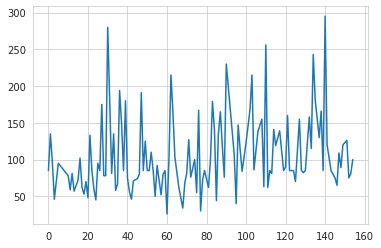

In [225]:
plt.plot(df.alk_phosphate.dropna())

In [226]:
# for alk_phosphate we can use mean for fill na
df['alk_phosphate'].fillna((df['alk_phosphate'].mean()), inplace=True)

In [227]:
# for albumin we can use 3.5 for fill na coz values are b/w 3 to 4.5 or we can also use mean

df['albumin'].fillna(3.5, inplace=True)

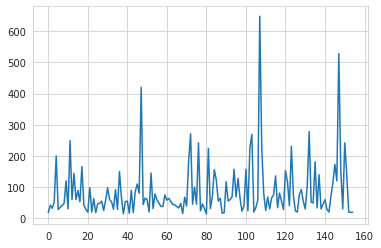

In [228]:
plt.plot(df.sgot.dropna())

In [229]:
df['sgot'].fillna((df['sgot'].mean()), inplace=True)

In [230]:
# filling na for spleen_palpable,steroid,fatigue,malaise,anorexia,spiders,ascites,varices,bilirubin,sgot
#By using the forward fill method and we can also use backward method
#For filling Categorical we can also use mode method
df = df.fillna(method='ffill')

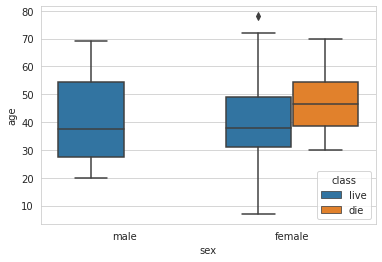

In [231]:
sns.boxplot(x='sex', y='age', hue='class', data=df)

# hear we can see the male are always live in every condion
#for female avg age for die is 45+

In [232]:
# for filling Categorical  values we can use label encoding or one hot encoding
# for this data set most of values are true and false so we can use label encodig or pd.getdummy method.

In [233]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.000000,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.000000,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.000000,32.0,4.0,False,live
3,31,female,True,True,False,False,False,True,False,False,False,False,False,0.7,46.000000,52.0,4.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,105.325397,200.0,4.0,False,live


In [234]:
df['liver_firm'] = df.liver_firm.astype(str)

In [235]:
df['liver_big'] = df.liver_big.astype(str)

In [236]:
categorical_columns = ['sex', 	'steroid', 'histology',	'antivirals', 	'fatigue', 	'malaise', 	'anorexia', 	'liver_big', 	'liver_firm', 	'spleen_palpable', 	'spiders', 	'ascites', 	'varices']

In [237]:
for col in categorical_columns:
  print(col)
  labelencoder = LabelEncoder()
  labelencoder.fit(df[col])
  df[col] = labelencoder.fit_transform(df[col])

sex
steroid
histology
antivirals
fatigue
malaise
anorexia
liver_big
liver_firm
spleen_palpable
spiders
ascites
varices


In [238]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,0,live
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.000000,42.0,3.5,0,live
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.000000,32.0,4.0,0,live
3,31,0,1,1,0,0,0,1,0,0,0,0,0,0.7,46.000000,52.0,4.0,0,live
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,105.325397,200.0,4.0,0,live


In [239]:
type(df.sex[0])

numpy.int64

In [240]:

# Training and Predicting

In [245]:
labelencoder = LabelEncoder()
labelencoder.fit(df['class'])
df['class'] = labelencoder.fit_transform(df['class'])

In [241]:
from sklearn.model_selection import train_test_split

In [246]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

0      1
1      1
2      1
3      1
4      1
      ..
150    0
151    1
152    1
153    1
154    0
Name: class, Length: 155, dtype: int64

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.20, 
                                                    random_state=101)

In [250]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [251]:
predictions = logmodel.predict(X_test)

In [252]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8709677419354839